<a href="https://colab.research.google.com/github/arislaoliveira/A3/blob/main/A3_21_04_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A3 - Analise de dados e big data

In [4]:
import pandas as pd

In [5]:
import numpy as np

Upload dos data frames do IMDb

Um com o código e o rating dos títulos e o outro com os códigos, título principal e etc

In [6]:
df_rating = pd.read_csv('/content/drive/MyDrive/Análise de dados /A3 - Análise de dados /title.ratings.tsv', sep='\t')
df_title = pd.read_csv('/content/drive/MyDrive/Análise de dados /A3 - Análise de dados /title.basics.tsv', sep='\t')

<ipython-input-6-217b0c0397da>:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_title = pd.read_csv('/content/drive/MyDrive/Análise de dados /A3 - Análise de dados /title.basics.tsv', sep='\t')


In [7]:
display(df_rating)

,tconst,averageRating,numVotes
0,tt0000001,5.7,2044
1,tt0000002,5.7,273
2,tt0000003,6.5,2003
3,tt0000004,5.4,178
4,tt0000005,6.2,2762
...,...,...,...
1428589,tt9916730,7.0,12
1428590,tt9916766,7.1,23
1428591,tt9916778,7.2,36
1428592,tt9916840,7.0,9


Aqui foi criada uma nova coluna na qual o Rating é dividido pelo número de votos multiplicado por 10

O objetivo é ter uma forma de classificação mais real, levando em conta a quantidade de telespectadores

In [8]:
df_rating['approval'] = df_rating['averageRating'] / 10 * df_rating['numVotes']
display(df_rating)

,tconst,averageRating,numVotes,approval
0,tt0000001,5.7,2044,1165.08
1,tt0000002,5.7,273,155.61
2,tt0000003,6.5,2003,1301.95
3,tt0000004,5.4,178,96.12
4,tt0000005,6.2,2762,1712.44
...,...,...,...,...
1428589,tt9916730,7.0,12,8.40
1428590,tt9916766,7.1,23,16.33
1428591,tt9916778,7.2,36,25.92
1428592,tt9916840,7.0,9,6.30


Aqui o data frame de títulos teve um tratamento para os dados nulos e conversão da coluna "ano de lançamento" para numérica, para poder fazer o merge com o outro df

In [9]:
display(df_title)
df_title.fillna('Unknow', inplace=True)
df_title.dropna()
df_title['startYear'] = df_title['startYear'].replace('\\N', pd.NA)
df_title['startYear'] = pd.to_numeric(df_title['startYear'], errors='coerce')
df_title['startYear'] = df_title['startYear'].astype('Int64')
print(df_title.dtypes)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...
10709945,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2009,\N,\N,"Action,Drama,Family"
10709946,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,\N,\N,"Action,Drama,Family"
10709947,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,\N,\N,"Action,Drama,Family"
10709948,tt9916856,short,The Wind,The Wind,0,2015,\N,27,Short


tconst            object
titleType         object
primaryTitle      object
originalTitle     object
isAdult           object
startYear          Int64
endYear           object
runtimeMinutes    object
genres            object
dtype: object


Upload do df com o catálogo da Netflix em 2021

In [10]:
df_netflix = pd.read_csv('/content/drive/MyDrive/Análise de dados /A3 - Análise de dados /netflix_titles.csv', sep=',')
display(df_netflix)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


Divisão do catálogo da Netflix para filmes

In [11]:
df_movies = df_netflix[df_netflix['type'] == 'Movie']
display(df_movies)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


Merge do df com os títulos do IMDb


Usei a coluna Título e Ano de lançamento para ter uma combinação mais precisa, levando em conta a possibilidade de títulos repetidos

In [12]:
df_merged = pd.merge(df_title, df_movies, how='inner', left_on=['primaryTitle', 'startYear'], right_on=['title', 'release_year'])
display(df_merged)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,show_id,...,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,tt0034498,short,The Battle of Midway,The Battle of Midway,0,1942,\N,18,"Documentary,Short,War",s8206,...,The Battle of Midway,John Ford,"Henry Fonda, Jane Darwell",United States,"March 31, 2017",1942,TV-14,18 min,"Classic Movies, Documentaries",Director John Ford captures combat footage of ...
1,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001,\N,118,"Comedy,Fantasy,Romance",s7171,...,Kate & Leopold,James Mangold,"Meg Ryan, Hugh Jackman, Liev Schreiber, Brecki...",United States,"January 1, 2020",2001,PG-13,118 min,"Comedies, Romantic Movies",A present-day woman takes responsibility for g...
2,tt0036630,short,San Pietro,San Pietro,0,1945,\N,32,"Documentary,Short,War",s7931,...,San Pietro,John Huston,NaN,United States,"March 31, 2017",1945,TV-14,32 min,"Classic Movies, Documentaries","After the Allies invade Italy, the Liri Valley..."
3,tt0037404,movie,Tunisian Victory,Tunisian Victory,0,1944,\N,75,"Documentary,War",s8641,...,Tunisian Victory,"Frank Capra, John Huston, Hugh Stewart, Roy Bo...",Burgess Meredith,"United States, United Kingdom","March 31, 2017",1944,TV-14,76 min,"Classic Movies, Documentaries",British and American troops join forces to lib...
4,tt0038171,short,Thunderbolt,Thunderbolt,0,1947,\N,44,"Documentary,History,Short",s8588,...,Thunderbolt,"William Wyler, John Sturges","James Stewart, Lloyd Bridges",United States,"March 31, 2017",1947,TV-PG,42 min,"Classic Movies, Documentaries",A P-47 Thunderbolt squadron is shown in prepar...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7840,tt9866700,movie,Paranormal Investigation,Paranormal Investigation,0,2018,\N,92,"Horror,Thriller",s4060,...,Paranormal Investigation,Franck Phelizon,"Andrei Indreies, Jean-Baptiste Heuet, Jose Atu...","United States, France","March 1, 2019",2018,TV-14,93 min,"Horror Movies, International Movies, Thrillers",When a young man becomes possessed after playi...
7841,tt9866736,movie,Rise: Ini Kalilah,Rise: Ini Kalilah,0,2018,\N,100,"Crime,Drama,History",s532,...,Rise: Ini Kalilah,"Saw Teong Hin, Nik Amir Mustapha, M.S. Prem Nath","Remy Ishak, Mira Filzah, Jack Tan, Sangeeta Kr...",Malaysia,"July 6, 2021",2018,TV-PG,101 min,"Dramas, International Movies","Inspired by Malaysia's 14th General Election, ..."
7842,tt9877170,movie,Malang,Malang - Unleash the Madness,0,2020,\N,135,"Action,Crime,Drama",s2535,...,Malang,Mohit Suri,"Anil Kapoor, Aditya Roy Kapur, Disha Patani, K...",India,"May 14, 2020",2020,TV-MA,131 min,"Action & Adventure, International Movies, Roma...",Years after a police encounter separates him f...
7843,tt9887580,movie,Bulletproof 2,Bulletproof 2,0,2020,\N,97,"Action,Comedy",s3042,...,Bulletproof 2,Don Michael Paul,"Faizon Love, Kirk Fox, Tony Todd, Pearl Thusi,...",United States,"January 9, 2020",2020,TV-MA,97 min,"Action & Adventure, Comedies",A special agent abruptly reunites with a crimi...


Merge do df criado anteriormente com o Rating e a coluna de aprovação que foi criada do IMDb

In [13]:
df_movies1 = pd.merge(df_merged, df_rating[['tconst', 'averageRating']], on='tconst', how='inner')
df_movies1 = pd.merge(df_movies1, df_rating[['tconst', 'approval']], on='tconst', how='left')

display(df_movies1)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,show_id,...,cast,country,date_added,release_year,rating,duration,listed_in,description,averageRating,approval
0,tt0034498,short,The Battle of Midway,The Battle of Midway,0,1942,\N,18,"Documentary,Short,War",s8206,...,"Henry Fonda, Jane Darwell",United States,"March 31, 2017",1942,TV-14,18 min,"Classic Movies, Documentaries",Director John Ford captures combat footage of ...,6.1,1383.48
1,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001,\N,118,"Comedy,Fantasy,Romance",s7171,...,"Meg Ryan, Hugh Jackman, Liev Schreiber, Brecki...",United States,"January 1, 2020",2001,PG-13,118 min,"Comedies, Romantic Movies",A present-day woman takes responsibility for g...,6.4,56981.12
2,tt0036630,short,San Pietro,San Pietro,0,1945,\N,32,"Documentary,Short,War",s7931,...,NaN,United States,"March 31, 2017",1945,TV-14,32 min,"Classic Movies, Documentaries","After the Allies invade Italy, the Liri Valley...",6.6,1623.60
3,tt0037404,movie,Tunisian Victory,Tunisian Victory,0,1944,\N,75,"Documentary,War",s8641,...,Burgess Meredith,"United States, United Kingdom","March 31, 2017",1944,TV-14,76 min,"Classic Movies, Documentaries",British and American troops join forces to lib...,6.6,456.06
4,tt0038171,short,Thunderbolt,Thunderbolt,0,1947,\N,44,"Documentary,History,Short",s8588,...,"James Stewart, Lloyd Bridges",United States,"March 31, 2017",1947,TV-PG,42 min,"Classic Movies, Documentaries",A P-47 Thunderbolt squadron is shown in prepar...,6.6,459.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5334,tt9866700,movie,Paranormal Investigation,Paranormal Investigation,0,2018,\N,92,"Horror,Thriller",s4060,...,"Andrei Indreies, Jean-Baptiste Heuet, Jose Atu...","United States, France","March 1, 2019",2018,TV-14,93 min,"Horror Movies, International Movies, Thrillers",When a young man becomes possessed after playi...,3.7,675.25
5335,tt9866736,movie,Rise: Ini Kalilah,Rise: Ini Kalilah,0,2018,\N,100,"Crime,Drama,History",s532,...,"Remy Ishak, Mira Filzah, Jack Tan, Sangeeta Kr...",Malaysia,"July 6, 2021",2018,TV-PG,101 min,"Dramas, International Movies","Inspired by Malaysia's 14th General Election, ...",5.1,28.05
5336,tt9877170,movie,Malang,Malang - Unleash the Madness,0,2020,\N,135,"Action,Crime,Drama",s2535,...,"Anil Kapoor, Aditya Roy Kapur, Disha Patani, K...",India,"May 14, 2020",2020,TV-MA,131 min,"Action & Adventure, International Movies, Roma...",Years after a police encounter separates him f...,6.5,7848.10
5337,tt9887580,movie,Bulletproof 2,Bulletproof 2,0,2020,\N,97,"Action,Comedy",s3042,...,"Faizon Love, Kirk Fox, Tony Todd, Pearl Thusi,...",United States,"January 9, 2020",2020,TV-MA,97 min,"Action & Adventure, Comedies",A special agent abruptly reunites with a crimi...,3.7,259.00


Aqui foi feito o mesmo que antes porém com as series

In [14]:
df_show = df_netflix[df_netflix['type'] == 'TV Show']
display(df_show)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,NaN,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada","May 1, 2018",2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...
8796,s8797,TV Show,Yunus Emre,NaN,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,"January 17, 2017",2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves..."
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."


In [15]:
df_merged1 = pd.merge(df_title, df_show, how='inner', left_on=['primaryTitle', 'startYear'], right_on=['title', 'release_year'])
display(df_merged1)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,show_id,...,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,tt0086798,tvMiniSeries,Shaka Zulu,Shaka Zulu,0,1986,1986,55,"Action,Biography,Drama",s7994,...,Shaka Zulu,NaN,"Edward Fox, Robert Powell, Trevor Howard, Fion...","Italy, South Africa, West Germany, Australia, ...","January 10, 2019",1986,TV-14,1 Season,TV Dramas,This miniseries recounts the early 19th-centur...
1,tt0088595,tvSeries,Robotech,Robotech,0,1985,1985,30,"Action,Adventure,Animation",s7879,...,Robotech,NaN,"Jean-Claude Ballard, Gregory Snegoff, Cam Clar...","United States, Japan","October 1, 2016",1985,TV-MA,1 Season,Anime Series,When a mysterious spaceship crashes in the Pac...
2,tt0094478,tvSeries,High Risk,High Risk,0,1988,\N,60,\N,s5300,...,High Risk,NaN,NaN,United States,"September 1, 2017",1988,TV-PG,1 Season,"Docuseries, Reality TV","From scientists to snake handlers, this series..."
3,tt0096707,tvSeries,The Super Mario Bros. Super Show!,The Super Mario Bros. Super Show!,0,1989,1989,30,"Action,Adventure,Animation",s8524,...,The Super Mario Bros. Super Show!,NaN,"Captain Lou Albano, Danny Wells, Jeannie Elias...","United States, Canada","May 22, 2016",1989,TV-Y7,1 Season,Kids' TV,"Mixing live action and animation, this classic..."
4,tt0098936,tvSeries,Twin Peaks,Twin Peaks,0,1990,1991,50,"Crime,Drama,Mystery",s8645,...,Twin Peaks,NaN,"Kyle MacLachlan, Michael Ontkean, Mädchen Amic...",United States,"July 1, 2017",1990,TV-14,2 Seasons,"Classic & Cult TV, Crime TV Shows, TV Dramas","""Who killed Laura Palmer?"" is the question on ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2336,tt9882870,tvSeries,The Perfect Match,Ji pin jue pei,0,2017,2017,90,Romance,s4172,...,The Perfect Match,NaN,"Wu Kang-jen, Ivy Shao, Ben Wu, Xiao Man, Nylon...",NaN,"January 25, 2019",2017,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...",A night market vendor clashes with a lofty cel...
2337,tt9899340,tvSeries,Her Private Life,Geunyeoui Sasaenghwal,0,2019,2019,75,"Comedy,Romance",s457,...,Her Private Life,NaN,"Park Min-young, Kim Jae-uk, Ahn Bo-hyun, Jung ...",South Korea,"July 15, 2021",2019,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...","An art curator's life unravels, as she tries t..."
2338,tt9899342,tvSeries,Flowering Heart,Flowering Heart,0,2016,\N,12,"Action,Adventure,Animation",s6771,...,Flowering Heart,NaN,"Choi Da-in, Yang Se-na, Gim Chae-eun, Esther, ...",South Korea,"July 1, 2019",2016,TV-Y7,1 Season,"Kids' TV, Korean TV Shows","An ordinary student, who forms an advice club ..."
2339,tt9905656,tvSeries,Bangkok Love Stories: Hey You!,Bangkok Love Stories: Hey You!,0,2018,\N,\N,Drama,s4030,...,Bangkok Love Stories: Hey You!,NaN,"Wanida Termthanaporn, Isariya Patharamanop, No...",NaN,"March 8, 2019",2018,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...",A loving couple become rivals when Belle opens...


In [16]:
df_show1 = pd.merge(df_merged1, df_rating[['tconst', 'averageRating']], on='tconst', how='inner')
df_show1 = pd.merge(df_show1, df_rating[['tconst', 'approval']], on='tconst', how='left')

display(df_show1)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,show_id,...,cast,country,date_added,release_year,rating,duration,listed_in,description,averageRating,approval
0,tt0086798,tvMiniSeries,Shaka Zulu,Shaka Zulu,0,1986,1986,55,"Action,Biography,Drama",s7994,...,"Edward Fox, Robert Powell, Trevor Howard, Fion...","Italy, South Africa, West Germany, Australia, ...","January 10, 2019",1986,TV-14,1 Season,TV Dramas,This miniseries recounts the early 19th-centur...,7.7,2607.99
1,tt0088595,tvSeries,Robotech,Robotech,0,1985,1985,30,"Action,Adventure,Animation",s7879,...,"Jean-Claude Ballard, Gregory Snegoff, Cam Clar...","United States, Japan","October 1, 2016",1985,TV-MA,1 Season,Anime Series,When a mysterious spaceship crashes in the Pac...,8.5,3417.85
2,tt0096707,tvSeries,The Super Mario Bros. Super Show!,The Super Mario Bros. Super Show!,0,1989,1989,30,"Action,Adventure,Animation",s8524,...,"Captain Lou Albano, Danny Wells, Jeannie Elias...","United States, Canada","May 22, 2016",1989,TV-Y7,1 Season,Kids' TV,"Mixing live action and animation, this classic...",6.3,3095.82
3,tt0098936,tvSeries,Twin Peaks,Twin Peaks,0,1990,1991,50,"Crime,Drama,Mystery",s8645,...,"Kyle MacLachlan, Michael Ontkean, Mädchen Amic...",United States,"July 1, 2017",1990,TV-14,2 Seasons,"Classic & Cult TV, Crime TV Shows, TV Dramas","""Who killed Laura Palmer?"" is the question on ...",8.8,189308.24
4,tt0112159,tvSeries,Neon Genesis Evangelion,Shinseiki Evangelion,0,1995,1996,24,"Action,Animation,Drama",s3725,...,"Megumi Ogata, Kotono Mitsuishi, Yuriko Yamaguc...",Japan,"June 21, 2019",1995,TV-MA,1 Season,"Anime Series, International TV Shows","Fifteen years after the Second Impact, Shinji ...",8.5,72245.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,tt9882870,tvSeries,The Perfect Match,Ji pin jue pei,0,2017,2017,90,Romance,s4172,...,"Wu Kang-jen, Ivy Shao, Ben Wu, Xiao Man, Nylon...",NaN,"January 25, 2019",2017,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...",A night market vendor clashes with a lofty cel...,7.3,187.61
1594,tt9899340,tvSeries,Her Private Life,Geunyeoui Sasaenghwal,0,2019,2019,75,"Comedy,Romance",s457,...,"Park Min-young, Kim Jae-uk, Ahn Bo-hyun, Jung ...",South Korea,"July 15, 2021",2019,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...","An art curator's life unravels, as she tries t...",7.7,4899.51
1595,tt9899342,tvSeries,Flowering Heart,Flowering Heart,0,2016,\N,12,"Action,Adventure,Animation",s6771,...,"Choi Da-in, Yang Se-na, Gim Chae-eun, Esther, ...",South Korea,"July 1, 2019",2016,TV-Y7,1 Season,"Kids' TV, Korean TV Shows","An ordinary student, who forms an advice club ...",7.4,37.74
1596,tt9905656,tvSeries,Bangkok Love Stories: Hey You!,Bangkok Love Stories: Hey You!,0,2018,\N,\N,Drama,s4030,...,"Wanida Termthanaporn, Isariya Patharamanop, No...",NaN,"March 8, 2019",2018,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...",A loving couple become rivals when Belle opens...,6.2,11.78


Remoção das colunas irrelevantes ou com informações duplicadas e tratamento de dados nulos

In [17]:
df_movies1 = df_movies1.drop(['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult', 'startYear', 'endYear', 'runtimeMinutes', 'genres', 'show_id', 'rating', 'description'], axis=1)
df_movies1.fillna('Unknow', inplace=True)
df_movies1.dropna()

df_show1 = df_show1.drop(['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult', 'startYear', 'endYear', 'runtimeMinutes', 'genres', 'show_id', 'rating', 'description'], axis=1)
df_show1.fillna('Unknow', inplace=True)
df_show1.dropna()

,type,title,director,cast,country,date_added,release_year,duration,listed_in,averageRating,approval
0,TV Show,Shaka Zulu,Unknow,"Edward Fox, Robert Powell, Trevor Howard, Fion...","Italy, South Africa, West Germany, Australia, ...","January 10, 2019",1986,1 Season,TV Dramas,7.7,2607.99
1,TV Show,Robotech,Unknow,"Jean-Claude Ballard, Gregory Snegoff, Cam Clar...","United States, Japan","October 1, 2016",1985,1 Season,Anime Series,8.5,3417.85
2,TV Show,The Super Mario Bros. Super Show!,Unknow,"Captain Lou Albano, Danny Wells, Jeannie Elias...","United States, Canada","May 22, 2016",1989,1 Season,Kids' TV,6.3,3095.82
3,TV Show,Twin Peaks,Unknow,"Kyle MacLachlan, Michael Ontkean, Mädchen Amic...",United States,"July 1, 2017",1990,2 Seasons,"Classic & Cult TV, Crime TV Shows, TV Dramas",8.8,189308.24
4,TV Show,Neon Genesis Evangelion,Unknow,"Megumi Ogata, Kotono Mitsuishi, Yuriko Yamaguc...",Japan,"June 21, 2019",1995,1 Season,"Anime Series, International TV Shows",8.5,72245.75
...,...,...,...,...,...,...,...,...,...,...,...
1593,TV Show,The Perfect Match,Unknow,"Wu Kang-jen, Ivy Shao, Ben Wu, Xiao Man, Nylon...",Unknow,"January 25, 2019",2017,1 Season,"International TV Shows, Romantic TV Shows, TV ...",7.3,187.61
1594,TV Show,Her Private Life,Unknow,"Park Min-young, Kim Jae-uk, Ahn Bo-hyun, Jung ...",South Korea,"July 15, 2021",2019,1 Season,"International TV Shows, Romantic TV Shows, TV ...",7.7,4899.51
1595,TV Show,Flowering Heart,Unknow,"Choi Da-in, Yang Se-na, Gim Chae-eun, Esther, ...",South Korea,"July 1, 2019",2016,1 Season,"Kids' TV, Korean TV Shows",7.4,37.74
1596,TV Show,Bangkok Love Stories: Hey You!,Unknow,"Wanida Termthanaporn, Isariya Patharamanop, No...",Unknow,"March 8, 2019",2018,1 Season,"International TV Shows, Romantic TV Shows, TV ...",6.2,11.78


In [18]:
display(df_movies1.head(1))
display(df_show1.head(1))

,type,title,director,cast,country,date_added,release_year,duration,listed_in,averageRating,approval
0,Movie,The Battle of Midway,John Ford,"Henry Fonda, Jane Darwell",United States,"March 31, 2017",1942,18 min,"Classic Movies, Documentaries",6.1,1383.48


,type,title,director,cast,country,date_added,release_year,duration,listed_in,averageRating,approval
0,TV Show,Shaka Zulu,Unknow,"Edward Fox, Robert Powell, Trevor Howard, Fion...","Italy, South Africa, West Germany, Australia, ...","January 10, 2019",1986,1 Season,TV Dramas,7.7,2607.99


Upload do df de indicações e vencedores do Oscar

In [19]:
df_oscar = pd.read_csv('/content/drive/MyDrive/Análise de dados /A3 - Análise de dados /the_oscar_award.csv', sep=',')
display(df_oscar)

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False
...,...,...,...,...,...,...,...
10884,2023,2024,96,WRITING (Original Screenplay),Written by Celine Song,Past Lives,False
10885,2023,2024,96,JEAN HERSHOLT HUMANITARIAN AWARD,NaN,NaN,True
10886,2023,2024,96,HONORARY AWARD,"To Angela Bassett, who has inspired audiences ...",NaN,True
10887,2023,2024,96,HONORARY AWARD,"To Mel Brooks, for his comedic brilliance, pro...",NaN,True


Merge do df de filmes da Netflix com o df do Oscar




In [20]:
df_netflix_oscar = pd.merge(df_movies1, df_oscar, how='inner', left_on=['title', 'release_year'], right_on=['film', 'year_film'])
df_netflix_oscar.dropna()
display(df_netflix_oscar)

,type,title,director,cast,country,date_added,release_year,duration,listed_in,averageRating,approval,year_film,year_ceremony,ceremony,category,name,film,winner
0,Movie,The Battle of Midway,John Ford,"Henry Fonda, Jane Darwell",United States,"March 31, 2017",1942,18 min,"Classic Movies, Documentaries",6.1,1383.48,1942,1943,15,DOCUMENTARY,United States Navy,The Battle of Midway,True
1,Movie,Kate & Leopold,James Mangold,"Meg Ryan, Hugh Jackman, Liev Schreiber, Brecki...",United States,"January 1, 2020",2001,118 min,"Comedies, Romantic Movies",6.4,56981.12,2001,2002,74,MUSIC (Original Song),Music and Lyric by Sting,Kate & Leopold,False
2,Movie,White Christmas,Michael Curtiz,"Bing Crosby, Danny Kaye, Rosemary Clooney, Ver...",United States,"November 15, 2020",1954,120 min,"Children & Family Movies, Classic Movies, Come...",7.6,38842.08,1954,1955,27,MUSIC (Song),Music and Lyrics by Irving Berlin,White Christmas,False
3,Movie,Forbidden Planet,Fred M. Wilcox,"Leslie Nielsen, Walter Pidgeon, Anne Francis, ...",United States,"November 1, 2019",1956,98 min,"Action & Adventure, Classic Movies, Sci-Fi & F...",7.5,39849.75,1956,1957,29,SPECIAL EFFECTS,"A. Arnold Gillespie, Irving Ries, Wesley C. Mi...",Forbidden Planet,False
4,Movie,Cat on a Hot Tin Roof,Richard Brooks,"Elizabeth Taylor, Paul Newman, Burl Ives, Jack...",United States,"November 1, 2019",1958,108 min,"Classic Movies, Dramas",7.9,42174.15,1958,1959,31,ACTOR,Paul Newman,Cat on a Hot Tin Roof,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,Movie,The Two Popes,Fernando Meirelles,"Anthony Hopkins, Jonathan Pryce, Juan Minujín","United Kingdom, Italy","December 20, 2019",2019,126 min,Dramas,7.6,100983.48,2019,2020,92,ACTOR IN A SUPPORTING ROLE,Anthony Hopkins,The Two Popes,False
1097,Movie,The Two Popes,Fernando Meirelles,"Anthony Hopkins, Jonathan Pryce, Juan Minujín","United Kingdom, Italy","December 20, 2019",2019,126 min,Dramas,7.6,100983.48,2019,2020,92,WRITING (Adapted Screenplay),Written by Anthony McCarten,The Two Popes,False
1098,Movie,Life Overtakes Me,"John Haptas, Kristine Samuelson",Unknow,"Sweden, United States","June 15, 2019",2019,40 min,Documentaries,6.5,1402.70,2019,2020,92,DOCUMENTARY (Short Subject),John Haptas and Kristine Samuelson,Life Overtakes Me,False
1099,Movie,American Factory,"Steven Bognar, Julia Reichert",Unknow,United States,"August 21, 2019",2019,110 min,Documentaries,7.4,17652.70,2019,2020,92,DOCUMENTARY (Feature),"Steven Bognar, Julia Reichert and Jeff Reichert",American Factory,True


Remoção de colunas e tratamento de dados nulos

In [21]:
df_netflix_oscar = df_netflix_oscar.drop(['film', 'ceremony', 'year_film'], axis=1)
df_netflix_oscar.fillna('Unknow', inplace=True)
df_netflix_oscar.dropna()

,type,title,director,cast,country,date_added,release_year,duration,listed_in,averageRating,approval,year_film,year_ceremony,ceremony,category,name,film,winner
0,Movie,The Battle of Midway,John Ford,"Henry Fonda, Jane Darwell",United States,"March 31, 2017",1942,18 min,"Classic Movies, Documentaries",6.1,1383.48,1942,1943,15,DOCUMENTARY,United States Navy,The Battle of Midway,True
1,Movie,Kate & Leopold,James Mangold,"Meg Ryan, Hugh Jackman, Liev Schreiber, Brecki...",United States,"January 1, 2020",2001,118 min,"Comedies, Romantic Movies",6.4,56981.12,2001,2002,74,MUSIC (Original Song),Music and Lyric by Sting,Kate & Leopold,False
2,Movie,White Christmas,Michael Curtiz,"Bing Crosby, Danny Kaye, Rosemary Clooney, Ver...",United States,"November 15, 2020",1954,120 min,"Children & Family Movies, Classic Movies, Come...",7.6,38842.08,1954,1955,27,MUSIC (Song),Music and Lyrics by Irving Berlin,White Christmas,False
3,Movie,Forbidden Planet,Fred M. Wilcox,"Leslie Nielsen, Walter Pidgeon, Anne Francis, ...",United States,"November 1, 2019",1956,98 min,"Action & Adventure, Classic Movies, Sci-Fi & F...",7.5,39849.75,1956,1957,29,SPECIAL EFFECTS,"A. Arnold Gillespie, Irving Ries, Wesley C. Mi...",Forbidden Planet,False
4,Movie,Cat on a Hot Tin Roof,Richard Brooks,"Elizabeth Taylor, Paul Newman, Burl Ives, Jack...",United States,"November 1, 2019",1958,108 min,"Classic Movies, Dramas",7.9,42174.15,1958,1959,31,ACTOR,Paul Newman,Cat on a Hot Tin Roof,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,Movie,The Two Popes,Fernando Meirelles,"Anthony Hopkins, Jonathan Pryce, Juan Minujín","United Kingdom, Italy","December 20, 2019",2019,126 min,Dramas,7.6,100983.48,2019,2020,92,ACTOR IN A SUPPORTING ROLE,Anthony Hopkins,The Two Popes,False
1097,Movie,The Two Popes,Fernando Meirelles,"Anthony Hopkins, Jonathan Pryce, Juan Minujín","United Kingdom, Italy","December 20, 2019",2019,126 min,Dramas,7.6,100983.48,2019,2020,92,WRITING (Adapted Screenplay),Written by Anthony McCarten,The Two Popes,False
1098,Movie,Life Overtakes Me,"John Haptas, Kristine Samuelson",Unknow,"Sweden, United States","June 15, 2019",2019,40 min,Documentaries,6.5,1402.70,2019,2020,92,DOCUMENTARY (Short Subject),John Haptas and Kristine Samuelson,Life Overtakes Me,False
1099,Movie,American Factory,"Steven Bognar, Julia Reichert",Unknow,United States,"August 21, 2019",2019,110 min,Documentaries,7.4,17652.70,2019,2020,92,DOCUMENTARY (Feature),"Steven Bognar, Julia Reichert and Jeff Reichert",American Factory,True


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Classificações

**Total de filmes e séries na Netflix**

In [23]:
count_type = df_netflix.groupby('type')['title'].count()

display(count_type)

type
Movie      6131
TV Show    2676
Name: title, dtype: int64

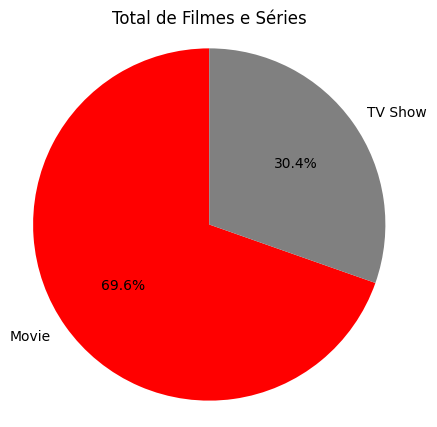

In [24]:
colors = ['red', 'grey']
plt.figure(figsize=(5, 5))
plt.pie(count_type, labels=count_type.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Total de Filmes e Séries')
plt.axis('equal')
plt.show()

**Total de filmes/ séries por categoria na Netflix**

In [25]:
df_netflix['listed_in'] = df_netflix['listed_in'].str.split(',')

df_genre = df_netflix.explode('listed_in')
df_genre['listed_in'] = df_genre['listed_in'].str.strip()

count_genre = df_genre.groupby('listed_in')['title'].count()
count_genre_sorted = count_genre.sort_values(ascending=False)

display(count_genre_sorted)

listed_in
International Movies            2752
Dramas                          2427
Comedies                        1674
International TV Shows          1351
Documentaries                    869
Action & Adventure               859
TV Dramas                        763
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
TV Comedies                      581
Thrillers                        577
Crime TV Shows                   470
Kids' TV                         451
Docuseries                       395
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 253
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     176
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korean TV Shows             

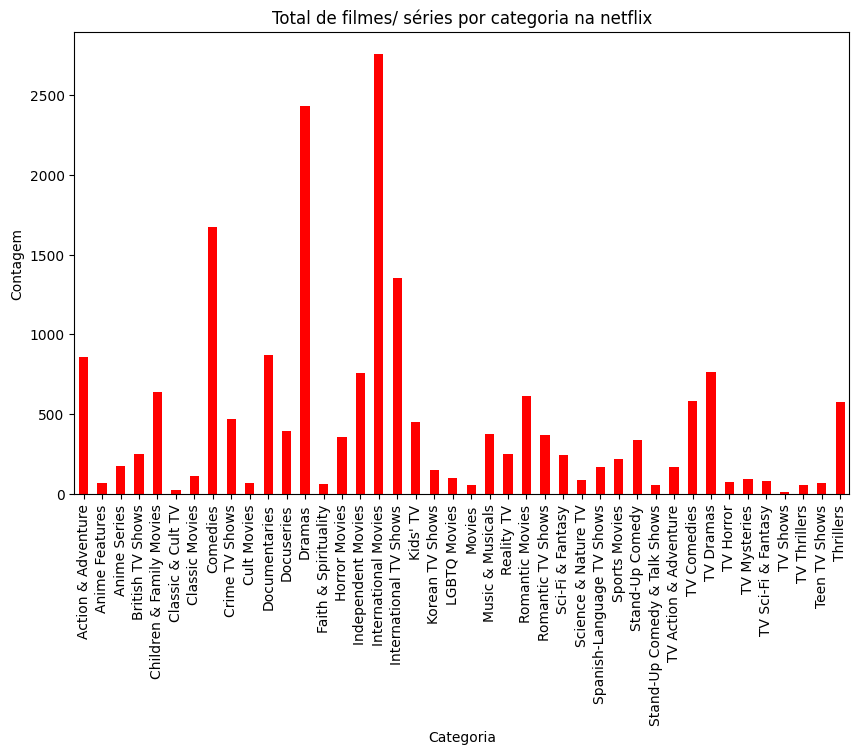

In [26]:
plt.figure(figsize=(10, 6))
count_genre.plot(kind='bar', color='red')
plt.title('Total de filmes/ séries por categoria na netflix')
plt.xlabel('Categoria')
plt.ylabel('Contagem')
plt.show()

**O filme com a maior aprovação do público**

In [27]:
print(df_movies1.loc[df_movies1['approval'].idxmax()])

type                                                         Movie
title                                                    Inception
director                                         Christopher Nolan
cast             Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...
country                              United States, United Kingdom
date_added                                          August 1, 2021
release_year                                                  2010
duration                                                   148 min
listed_in          Action & Adventure, Sci-Fi & Fantasy, Thrillers
averageRating                                                  8.8
approval                                                2241934.64
Name: 2169, dtype: object


In [28]:
display(df_movies1.sort_values(by='approval', ascending=False).head(10))

,type,title,director,cast,country,date_added,release_year,duration,listed_in,averageRating,approval
2169,Movie,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...","United States, United Kingdom","August 1, 2021",2010,148 min,"Action & Adventure, Sci-Fi & Fantasy, Thrillers",8.8,2241934.64
228,Movie,Pulp Fiction,Quentin Tarantino,"John Travolta, Samuel L. Jackson, Uma Thurman,...",United States,"January 1, 2019",1994,154 min,"Classic Movies, Cult Movies, Dramas",8.9,1973162.04
332,Movie,The Matrix,"Lilly Wachowski, Lana Wachowski","Keanu Reeves, Laurence Fishburne, Carrie-Anne ...",United States,"November 1, 2019",1999,136 min,"Action & Adventure, Sci-Fi & Fantasy",8.7,1783899.33
379,Movie,The Lord of the Rings: The Return of the King,Peter Jackson,"Elijah Wood, Ian McKellen, Liv Tyler, Viggo Mo...","New Zealand, United States","January 1, 2020",2003,201 min,"Action & Adventure, Sci-Fi & Fantasy",9.0,1779294.60
382,Movie,The Lord of the Rings: The Two Towers,Peter Jackson,"Elijah Wood, Ian McKellen, Liv Tyler, Viggo Mo...","New Zealand, United States","January 1, 2020",2002,179 min,"Action & Adventure, Sci-Fi & Fantasy",8.8,1568047.36
1813,Movie,Django Unchained,Quentin Tarantino,"Jamie Foxx, Christoph Waltz, Leonardo DiCaprio...",United States,"July 24, 2021",2012,165 min,"Action & Adventure, Dramas",8.5,1438666.65
601,Movie,Inglourious Basterds,Quentin Tarantino,"Brad Pitt, Mélanie Laurent, Christoph Waltz, E...","Germany, United States","July 22, 2019",2009,153 min,Action & Adventure,8.4,1328791.80
211,Movie,Schindler's List,Steven Spielberg,"Liam Neeson, Ben Kingsley, Ralph Fiennes, Caro...",United States,"April 1, 2018",1993,195 min,"Classic Movies, Dramas",9.0,1304074.80
683,Movie,The Departed,Martin Scorsese,"Leonardo DiCaprio, Matt Damon, Jack Nicholson,...","United States, Hong Kong","January 1, 2021",2006,151 min,"Dramas, Thrillers",8.5,1207657.90
1613,Movie,Shutter Island,Martin Scorsese,"Leonardo DiCaprio, Mark Ruffalo, Ben Kingsley,...",United States,"February 1, 2021",2010,139 min,Thrillers,8.2,1192433.34


**O filme com a pior aprovação do público**

In [29]:
print(df_movies1.loc[df_movies1['approval'].idxmin()])

type                                                         Movie
title                                                      Destiny
director                                           Youssef Chahine
cast             Nour El-Sherif, Laila Elwi, Mahmoud Hemeida, S...
country                                              France, Egypt
date_added                                           June 19, 2020
release_year                                                  1997
duration                                                   136 min
listed_in                             Dramas, International Movies
averageRating                                                  3.8
approval                                                      2.28
Name: 281, dtype: object


In [30]:
display(df_movies1.sort_values(by='approval', ascending=True).head(10))

,type,title,director,cast,country,date_added,release_year,duration,listed_in,averageRating,approval
281,Movie,Destiny,Youssef Chahine,"Nour El-Sherif, Laila Elwi, Mahmoud Hemeida, S...","France, Egypt","June 19, 2020",1997,136 min,"Dramas, International Movies",3.8,2.28
2673,Movie,The Killing of a Sacred Deer,Yorgos Lanthimos,"Colin Farrell, Nicole Kidman, Barry Keoghan, A...","Ireland, United Kingdom","April 5, 2020",2017,121 min,"Dramas, Independent Movies, Thrillers",4.2,2.52
3023,Movie,Sinister 2,Ciarán Foy,"Shannyn Sossamon, John Beasley, James Ransone,...","United States, United Kingdom","October 16, 2019",2015,97 min,Horror Movies,5.6,2.80
2192,Movie,Bodyguard,Siddique,"Salman Khan, Kareena Kapoor, Raj Babbar, Asran...",India,"November 19, 2020",2011,130 min,"Action & Adventure, Comedies, International Mo...",4.1,2.87
3250,Movie,Chal Dhar Pakad,Aatmaram Dharne,Nagesh Bhonsle,India,"March 15, 2018",2010,129 min,"Comedies, Dramas, International Movies",3.7,2.96
1815,Movie,Canvas,Frank E. Abney III,Unknow,United States,"December 11, 2020",2020,9 min,"Children & Family Movies, Dramas",6.0,3.00
5083,Movie,Tremors 6: A Cold Day in Hell,Don Michael Paul,"Michael Gross, Jamie Kennedy, Tanya van Graan,...","United States, South Africa","May 1, 2018",2018,98 min,"Action & Adventure, Comedies, Horror Movies",6.0,3.00
2811,Movie,Stowaway,Joe Penna,"Anna Kendrick, Toni Collette, Daniel Dae Kim, ...","Germany, United States","April 22, 2021",2021,116 min,"Dramas, International Movies, Thrillers",6.6,3.30
2159,Movie,One Night Stand,Jasmine D'Souza,"Tanuj Virwani, Sunny Leone, Narendra Jetley, A...",India,"October 15, 2017",2016,93 min,"Dramas, International Movies, Music & Musicals",6.8,3.40
1967,Movie,The World Is Yours,Romain Gavras,"Isabelle Adjani, Karim Leklou, François Damien...",France,"November 30, 2018",2018,101 min,"Action & Adventure, Comedies, International Mo...",7.0,3.50


**A série com a maior aprovação do público**

In [31]:
print(df_show1.loc[df_show1['approval'].idxmax()])

type                                                       TV Show
title                                           The Queen's Gambit
director                                                    Unknow
cast             Anya Taylor-Joy, Bill Camp, Marielle Heller, T...
country                                              United States
date_added                                        October 23, 2020
release_year                                                  2020
duration                                                  1 Season
listed_in                                                TV Dramas
averageRating                                                  8.5
approval                                                 468707.85
Name: 68, dtype: object


In [32]:
display(df_show1.sort_values(by='approval', ascending=False).head(10))

,type,title,director,cast,country,date_added,release_year,duration,listed_in,averageRating,approval
68,TV Show,The Queen's Gambit,Unknow,"Anya Taylor-Joy, Bill Camp, Marielle Heller, T...",United States,"October 23, 2020",2020,1 Season,TV Dramas,8.5,468707.85
883,TV Show,Attack on Titan,Unknow,"Yuki Kaji, Yui Ishikawa, Marina Inoue, Kisho T...",Japan,"June 2, 2021",2013,1 Season,"Anime Series, International TV Shows",9.1,463097.18
101,TV Show,The Witcher,Unknow,"Henry Cavill, Anya Chalotra, Freya Allan, Jodh...","United States, Poland","December 20, 2019",2019,1 Season,"International TV Shows, TV Action & Adventure,...",8.0,455282.40
267,TV Show,Squid Game,Unknow,"Lee Jung-jae, Park Hae-soo, Wi Ha-jun, Oh Youn...",Unknow,"September 17, 2021",2021,1 Season,"International TV Shows, TV Dramas, TV Thrillers",8.0,432335.20
363,TV Show,The Haunting of Hill House,Unknow,"Michiel Huisman, Carla Gugino, Timothy Hutton,...",United States,"October 12, 2018",2018,1 Season,"TV Dramas, TV Horror, TV Mysteries",8.6,247489.94
3,TV Show,Twin Peaks,Unknow,"Kyle MacLachlan, Michael Ontkean, Mädchen Amic...",United States,"July 1, 2017",1990,2 Seasons,"Classic & Cult TV, Crime TV Shows, TV Dramas",8.8,189308.24
1063,TV Show,Planet Earth II,Unknow,David Attenborough,United Kingdom,"December 25, 2017",2016,1 Season,"British TV Shows, Docuseries, Science & Nature TV",9.5,149793.15
404,TV Show,The Last Dance,Unknow,"Michael Jordan, Scottie Pippen, Dennis Rodman",United States,"June 19, 2021",2020,1 Season,Docuseries,9.1,138041.54
1547,TV Show,Demon Slayer: Kimetsu no Yaiba,Unknow,"Natsuki Hanae, Akari Kito, Hiro Shimono, Yoshi...",Japan,"January 22, 2021",2019,1 Season,"Anime Series, International TV Shows",8.6,126479.34
1453,TV Show,Bridgerton,Unknow,"Adjoa Andoh, Julie Andrews, Lorraine Ashbourne...",United States,"December 25, 2020",2020,1 Season,"Romantic TV Shows, TV Dramas",7.4,124157.20


**A série com a pior aprovação do público**

In [33]:
print(df_show1.loc[df_show1['approval'].idxmin()])

type                                                       TV Show
title                                                     Innocent
director                                                Seren Yüce
cast             Ali Atay, Haluk Bilginer, Nur Sürer, Okan Yala...
country                                                     Turkey
date_added                                        January 23, 2019
release_year                                                  2017
duration                                                  1 Season
listed_in        Crime TV Shows, International TV Shows, TV Dramas
averageRating                                                  3.8
approval                                                       1.9
Name: 1199, dtype: object


In [34]:
display(df_show1.sort_values(by='approval', ascending=True).head(10))

,type,title,director,cast,country,date_added,release_year,duration,listed_in,averageRating,approval
1199,TV Show,Innocent,Seren Yüce,"Ali Atay, Haluk Bilginer, Nur Sürer, Okan Yala...",Turkey,"January 23, 2019",2017,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",3.8,1.90
987,TV Show,Bromance,Unknow,"Baron Chen, Megan Lai, Bii, Katie Chen, Sean Lee",Taiwan,"December 1, 2016",2015,1 Season,"International TV Shows, Romantic TV Shows, TV ...",5.4,2.70
154,TV Show,Dogs,Unknow,Unknow,United States,"July 7, 2021",2021,2 Seasons,Docuseries,5.6,2.80
332,TV Show,Retribution,Unknow,"Georgina Campbell, Joe Dempsie, Adrian Edmonds...",United Kingdom,"January 30, 2018",2016,1 Season,"British TV Shows, Crime TV Shows, Internationa...",6.0,3.00
711,TV Show,Special,Unknow,"Ryan O'Connell, Jessica Hecht, Punam Patel, Ma...",United States,"May 20, 2021",2021,2 Seasons,TV Comedies,6.2,3.10
714,TV Show,Special,Unknow,"Ryan O'Connell, Jessica Hecht, Punam Patel, Ma...",United States,"May 20, 2021",2021,2 Seasons,TV Comedies,6.2,3.10
718,TV Show,Special,Unknow,"Ryan O'Connell, Jessica Hecht, Punam Patel, Ma...",United States,"May 20, 2021",2021,2 Seasons,TV Comedies,6.2,3.10
502,TV Show,Bountiful Blessings,Unknow,"Jessica Hsuan, Tay Ping Hui, Thomas Ong, Jeffr...",Singapore,"August 1, 2017",2011,1 Season,"International TV Shows, TV Dramas, TV Sci-Fi &...",6.4,3.20
789,TV Show,Sisters,Unknow,"Lucy Durack, Antonia Prebble, Maria Angelico, ...",Australia,"September 1, 2018",2018,1 Season,"International TV Shows, TV Comedies, TV Dramas",6.6,3.30
553,TV Show,The Umbrella Academy,Unknow,Unknow,"United States, Canada","July 31, 2020",2020,2 Seasons,"TV Action & Adventure, TV Mysteries, TV Sci-Fi...",5.6,3.36


In [35]:
df_netflix['country'] = df_netflix['country'].str.split(',')

df_country = df_netflix.explode('country')
df_country['country'] = df_country['country'].str.strip()

count_country= df_country.groupby('country')['title'].count()

count_country_sorted = count_country.sort_values(ascending=False)

display(count_country_sorted)

country
United States     3690
India             1046
United Kingdom     806
Canada             445
France             393
                  ... 
Jamaica              1
Slovakia             1
Nicaragua            1
Ethiopia             1
Liechtenstein        1
Name: title, Length: 123, dtype: int64

**Filmes que estão no catalogo da netflix com mais indicações ao Oscar**

In [36]:
oscar = df_netflix_oscar.groupby(['title']).size().reset_index(name='count')
display(oscar)

,title,count
0,20th Century Women,1
1,A Clockwork Orange,4
2,A Separation,2
3,A Serious Man,2
4,A Single Man,1
...,...,...
249,What's Eating Gilbert Grape,1
250,White Christmas,1
251,Winter on Fire: Ukraine's Fight for Freedom,1
252,Winter's Bone,4


In [37]:
display(oscar.sort_values(by='count', ascending=False).head(25))

,title,count
24,Black Panther,35
205,The Lord of the Rings: The Return of the King,33
115,Milk,32
176,The Artist,30
84,Inception,24
71,Hell or High Water,20
197,The Irishman,20
206,The Lord of the Rings: The Two Towers,18
166,Spotlight,18
182,The Crying Game,18


In [38]:
#titulo = input()
titulo = 'Black Panther'
indicacoes = df_netflix_oscar[df_netflix_oscar['title'] == titulo]

display(indicacoes)

,type,title,director,cast,country,date_added,release_year,duration,listed_in,averageRating,approval,year_film,year_ceremony,ceremony,category,name,film,winner
719,Movie,Black Panther,Ryan Coogler,"Chadwick Boseman, Michael B. Jordan, Lupita Ny...",United States,"September 4, 2018",2018,135 min,"Action & Adventure, Sci-Fi & Fantasy",7.3,610824.58,2018,2019,91,COSTUME DESIGN,Ruth Carter,Black Panther,True
720,Movie,Black Panther,Ryan Coogler,"Chadwick Boseman, Michael B. Jordan, Lupita Ny...",United States,"September 4, 2018",2018,135 min,"Action & Adventure, Sci-Fi & Fantasy",7.3,610824.58,2018,2019,91,MUSIC (Original Score),Ludwig Goransson,Black Panther,True
721,Movie,Black Panther,Ryan Coogler,"Chadwick Boseman, Michael B. Jordan, Lupita Ny...",United States,"September 4, 2018",2018,135 min,"Action & Adventure, Sci-Fi & Fantasy",7.3,610824.58,2018,2019,91,MUSIC (Original Song),"Music by Kendrick Lamar, Mark ""Sounwave"" Spear...",Black Panther,False
722,Movie,Black Panther,Ryan Coogler,"Chadwick Boseman, Michael B. Jordan, Lupita Ny...",United States,"September 4, 2018",2018,135 min,"Action & Adventure, Sci-Fi & Fantasy",7.3,610824.58,2018,2019,91,BEST PICTURE,"Kevin Feige, Producer",Black Panther,False
723,Movie,Black Panther,Ryan Coogler,"Chadwick Boseman, Michael B. Jordan, Lupita Ny...",United States,"September 4, 2018",2018,135 min,"Action & Adventure, Sci-Fi & Fantasy",7.3,610824.58,2018,2019,91,PRODUCTION DESIGN,Production Design: Hannah Beachler; Set Decora...,Black Panther,True
724,Movie,Black Panther,Ryan Coogler,"Chadwick Boseman, Michael B. Jordan, Lupita Ny...",United States,"September 4, 2018",2018,135 min,"Action & Adventure, Sci-Fi & Fantasy",7.3,610824.58,2018,2019,91,SOUND EDITING,Benjamin A. Burtt and Steve Boeddeker,Black Panther,False
725,Movie,Black Panther,Ryan Coogler,"Chadwick Boseman, Michael B. Jordan, Lupita Ny...",United States,"September 4, 2018",2018,135 min,"Action & Adventure, Sci-Fi & Fantasy",7.3,610824.58,2018,2019,91,SOUND MIXING,"Steve Boeddeker, Brandon Proctor and Peter Devlin",Black Panther,False
726,Movie,Black Panther,Ryan Coogler,"Chadwick Boseman, Michael B. Jordan, Lupita Ny...",United States,"September 4, 2018",2018,135 min,"Action & Adventure, Sci-Fi & Fantasy",6.9,13.11,2018,2019,91,COSTUME DESIGN,Ruth Carter,Black Panther,True
727,Movie,Black Panther,Ryan Coogler,"Chadwick Boseman, Michael B. Jordan, Lupita Ny...",United States,"September 4, 2018",2018,135 min,"Action & Adventure, Sci-Fi & Fantasy",6.9,13.11,2018,2019,91,MUSIC (Original Score),Ludwig Goransson,Black Panther,True
728,Movie,Black Panther,Ryan Coogler,"Chadwick Boseman, Michael B. Jordan, Lupita Ny...",United States,"September 4, 2018",2018,135 min,"Action & Adventure, Sci-Fi & Fantasy",6.9,13.11,2018,2019,91,MUSIC (Original Song),"Music by Kendrick Lamar, Mark ""Sounwave"" Spear...",Black Panther,False


**Filmes que estão no catalogo da netflix com mais prêmios Oscar**



In [39]:
vencedores = df_netflix_oscar[df_oscar['winner'] == True]
vencedores1 = vencedores.groupby('title').size().reset_index(name='win_count')
display(vencedores1.sort_values(by='win_count', ascending=False).head(25))

<ipython-input-39-84fd0a590751>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vencedores = df_netflix_oscar[df_oscar['winner'] == True]


,title,win_count
92,The Artist,11
62,Milk,10
104,The Lord of the Rings: The Return of the King,9
94,The Crying Game,6
7,Black Panther,6
67,Mutiny on the Bounty,4
23,District 9,4
55,Lincoln,4
17,Cliffhanger,4
35,Gigi,4


In [40]:
#titulo = input()
titulo = 'The Artist'
vencedores = df_netflix_oscar[(df_netflix_oscar['title'] == titulo) & (df_netflix_oscar['winner'] == True)]
display(vencedores)

,type,title,director,cast,country,date_added,release_year,duration,listed_in,averageRating,approval,year_film,year_ceremony,ceremony,category,name,film,winner
913,Movie,The Artist,Michel Hazanavicius,"Jean Dujardin, Bérénice Bejo, John Goodman, Ja...","France, Belgium, United States","April 25, 2020",2011,101 min,"Comedies, Dramas, Independent Movies",7.9,196326.85,2011,2012,84,ACTOR IN A LEADING ROLE,Jean Dujardin,The Artist,True
917,Movie,The Artist,Michel Hazanavicius,"Jean Dujardin, Bérénice Bejo, John Goodman, Ja...","France, Belgium, United States","April 25, 2020",2011,101 min,"Comedies, Dramas, Independent Movies",7.9,196326.85,2011,2012,84,COSTUME DESIGN,Mark Bridges,The Artist,True
918,Movie,The Artist,Michel Hazanavicius,"Jean Dujardin, Bérénice Bejo, John Goodman, Ja...","France, Belgium, United States","April 25, 2020",2011,101 min,"Comedies, Dramas, Independent Movies",7.9,196326.85,2011,2012,84,DIRECTING,Michel Hazanavicius,The Artist,True
920,Movie,The Artist,Michel Hazanavicius,"Jean Dujardin, Bérénice Bejo, John Goodman, Ja...","France, Belgium, United States","April 25, 2020",2011,101 min,"Comedies, Dramas, Independent Movies",7.9,196326.85,2011,2012,84,MUSIC (Original Score),Ludovic Bource,The Artist,True
921,Movie,The Artist,Michel Hazanavicius,"Jean Dujardin, Bérénice Bejo, John Goodman, Ja...","France, Belgium, United States","April 25, 2020",2011,101 min,"Comedies, Dramas, Independent Movies",7.9,196326.85,2011,2012,84,BEST PICTURE,"Thomas Langmann, Producer",The Artist,True
923,Movie,The Artist,Michel Hazanavicius,"Jean Dujardin, Bérénice Bejo, John Goodman, Ja...","France, Belgium, United States","April 25, 2020",2011,101 min,"Comedies, Dramas, Independent Movies",8.2,8.20,2011,2012,84,ACTOR IN A LEADING ROLE,Jean Dujardin,The Artist,True
927,Movie,The Artist,Michel Hazanavicius,"Jean Dujardin, Bérénice Bejo, John Goodman, Ja...","France, Belgium, United States","April 25, 2020",2011,101 min,"Comedies, Dramas, Independent Movies",8.2,8.20,2011,2012,84,COSTUME DESIGN,Mark Bridges,The Artist,True
928,Movie,The Artist,Michel Hazanavicius,"Jean Dujardin, Bérénice Bejo, John Goodman, Ja...","France, Belgium, United States","April 25, 2020",2011,101 min,"Comedies, Dramas, Independent Movies",8.2,8.20,2011,2012,84,DIRECTING,Michel Hazanavicius,The Artist,True
930,Movie,The Artist,Michel Hazanavicius,"Jean Dujardin, Bérénice Bejo, John Goodman, Ja...","France, Belgium, United States","April 25, 2020",2011,101 min,"Comedies, Dramas, Independent Movies",8.2,8.20,2011,2012,84,MUSIC (Original Score),Ludovic Bource,The Artist,True
931,Movie,The Artist,Michel Hazanavicius,"Jean Dujardin, Bérénice Bejo, John Goodman, Ja...","France, Belgium, United States","April 25, 2020",2011,101 min,"Comedies, Dramas, Independent Movies",8.2,8.20,2011,2012,84,BEST PICTURE,"Thomas Langmann, Producer",The Artist,True
